In [73]:
import pandas as pd


In [74]:
df=pd.read_csv('calories.csv')
df2=pd.read_csv('exercise.csv')

In [75]:
df.head(2)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0


In [76]:
df2.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3


In [77]:
#Mergening two data by id 
final_df=df.merge(df2,how='inner',on='User_ID')

In [78]:
final_df.head(2)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3


In [79]:
corr=final_df.corr()

<AxesSubplot:>

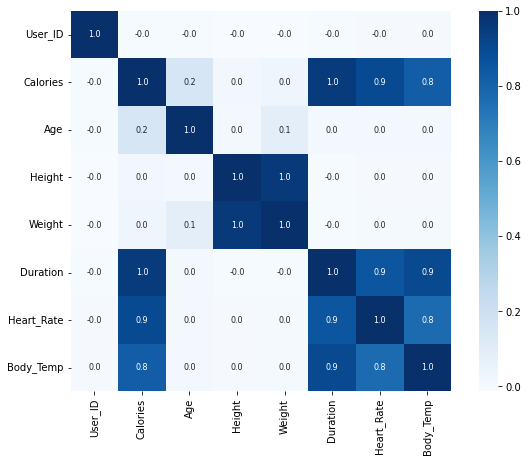

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cmap='Blues',annot_kws={'size':8},cbar=True,square=True,fmt='.1f')

In [81]:
print(corr['Calories'])

User_ID      -0.001661
Calories      1.000000
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Name: Calories, dtype: float64


## Columns are Body_temp , Duration, HEartrate and age are highly correlate to calories

In [82]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


## NO missing values


In [83]:
final_df.shape

(15000, 9)

In [84]:
final_df.head(2)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3


In [85]:
final_df['Gender']=final_df['Gender'].map({'male':1,'female':0})

In [86]:
#Dropping user id colmn
final_df.drop(['User_ID'],axis=1,inplace=True)

In [87]:
final_df.describe()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


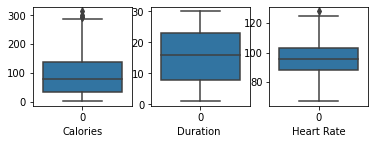

In [88]:
plt.subplot(2,3,1)
sns.boxplot(final_df['Calories'])
plt.xlabel("Calories")
plt.subplot(2,3,2)
sns.boxplot(final_df['Duration'])
plt.xlabel("Duration ")
plt.subplot(2,3,3)
sns.boxplot(final_df['Heart_Rate'])
plt.xlabel("Heart Rate")
plt.show()


In [89]:
#Checking dataset is balance or imbalance dataset
final_df["Gender"].value_counts()

0    7553
1    7447
Name: Gender, dtype: int64

C:\Users\rjbik\AppData\Local\Temp\ipykernel_5944\2821678549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Age'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

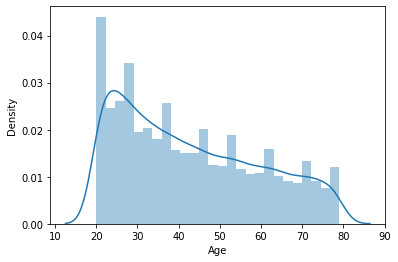

In [90]:
sns.distplot(final_df['Age'])

C:\Users\rjbik\AppData\Local\Temp\ipykernel_5944\3799167222.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Height'])
C:\Users\rjbik\AppData\Local\Temp\ipykernel_5944\3799167222.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Duration'])


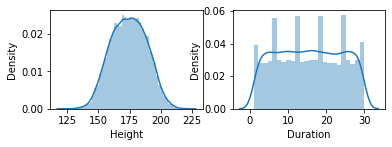

In [91]:
plt.subplot(2,2,1)
sns.distplot(final_df['Height'])
plt.subplot(2,2,2)
sns.distplot(final_df['Duration'])
plt.show()

In [92]:
print(corr['Calories'])

User_ID      -0.001661
Calories      1.000000
Age           0.154395
Height        0.017537
Weight        0.035481
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Name: Calories, dtype: float64


In [93]:
x=final_df.drop(['Calories'],axis=True)
x.head(2)


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3


In [94]:
y=final_df['Calories']
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [97]:
x_train.head(2)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
655,1,41,186.0,87.0,14.0,100.0,40.3
12044,0,20,162.0,59.0,18.0,95.0,40.6


In [98]:
y_train.head(2)

655      81.0
12044    87.0
Name: Calories, dtype: float64

In [99]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
from sklearn.model_selection import cross_val_score
model.fit(x_train,y_train)
#param={'aplha':[1,2,5,10,15,100]}


mse=cross_val_score(x_train,y_train,scoring='neg_mean_squared_error',cv=10)


TypeError: estimator should be an estimator implementing 'fit' method,        Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
655         1   41   186.0    87.0      14.0       100.0       40.3
12044       0   20   162.0    59.0      18.0        95.0       40.6
14844       0   52   159.0    62.0      23.0        99.0       40.4
13985       0   31   171.0    70.0       5.0        83.0       39.0
7974        1   52   182.0    86.0      28.0       104.0       40.3
...       ...  ...     ...     ...       ...         ...        ...
5191        0   75   148.0    51.0      22.0       104.0       40.6
13418       0   21   172.0    67.0      20.0       104.0       40.7
5390        1   57   189.0    92.0       8.0        90.0       39.5
860         1   35   174.0    76.0      12.0        97.0       40.2
7270        1   26   182.0    86.0      16.0        91.0       40.5

[10050 rows x 7 columns] was passed

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,40,49,50,55]}

ridge_regressor_split=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_regressor_split.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 40, 49, 50, 55]},
             scoring='neg_mean_squared_error')

In [ ]:
from sklearn.metrics import r2_score,accuracy_score

In [ ]:
y_pred=ridge_regressor_split.predict(x_test)

In [ ]:
r2_score(y_pred,y_test)


0.9647940269740178

C:\Users\rjbik\AppData\Local\Temp\ipykernel_1388\3524681940.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

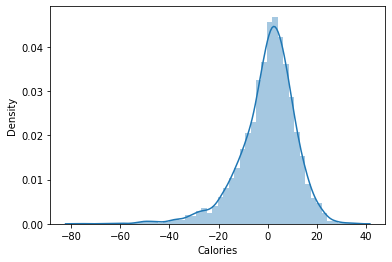

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_xgb=XGBRegressor()
model_xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
y_pred_xg=model_xgb.predict(x_test)

C:\Users\rjbik\AppData\Local\Temp\ipykernel_1388\1584915878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred_xg)


<AxesSubplot:xlabel='Calories', ylabel='Density'>

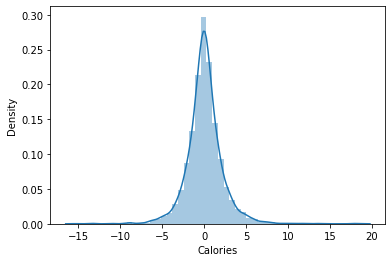

In [ ]:
sns.distplot(y_test-y_pred_xg)

In [ ]:
r2_score(y_test,y_pred_xg)

0.9988312322983717

In [ ]:
import pickle
#open your file where you want to store the data
pickle.dump(model_xgb,open('xg_boost.pkl','wb'))
pickled_model=pickle.load(open('xg_boost.pkl','rb'))

In [111]:
x_test.iloc[0:1,:]

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
11499,0,45,154.0,52.0,26.0,107.0,40.6


In [119]:
import numpy as np

In [120]:
pickled_model.predict(np.array([0,45,154,52,26,107,40]).reshape(1,-1))

array([171.8774], dtype=float32)